<a href="https://colab.research.google.com/github/Ali-Kazmi/All-Pairs-Shortest-Path/blob/master/APSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will use python's networkX library to perform All Pairs Shortest Paths (APSP) on the california road dataset. 

The cell below installs the files we need. 

In [0]:
!if ! test -f ca-roads.zip ; then wget https://github.com/rvuduc/graph-demos-for-ali/raw/master/sssp-networkx/ca-roads.zip ; fi
!if ! test -d ca-roads ; then unzip ca-roads.zip && ls -al | grep ca-roads* ; fi
!if ! test -f ca-roads-path-demo.png ; then wget https://raw.githubusercontent.com/rvuduc/graph-demos-for-ali/master/sssp-networkx/ca-roads-path-demo.png ; fi
!if ! test -f problem_utils.py ; then wget https://github.com/rvuduc/graph-demos-for-ali/raw/master/sssp-networkx/problem_utils.py ; fi

In [3]:
from google.colab import files

uploaded = files.upload()

Saving ol-nodes.csv to ol-nodes.csv


In [4]:
from google.colab import files

uploaded = files.upload()

Saving OL.cedge.csv to OL.cedge.csv


In [38]:
import pandas as pd

nodes = pd.read_csv("ol-nodes.csv",nrows=2000)
nodes.columns = ['Node_ID', 'X','Y']
print(nodes)

      Node_ID            X            Y
0           1   863.275757  3005.275635
1           2   690.196411  3333.704834
2           3  1197.556519  2984.470215
3           4  1261.188599  2985.956299
4           5   722.436707  3467.454346
...       ...          ...          ...
1995     1996  5259.831055  8158.344238
1996     1997  5121.961426  8039.456055
1997     1998  4969.244629  9184.871094
1998     1999  5509.693359  8321.816406
1999     2000  4911.975586  8922.945312

[2000 rows x 3 columns]


In [37]:
edges=pd.read_csv("OL.cedge.csv",nrows=2000)
edges.columns = ['Edge ID', 'Start_Node_ID','End_Node_ID','L2_distance']
print(edges)

      Edge ID  Start_Node_ID  End_Node_ID  L2_distance
0           1           2471         2479    29.718756
1           2           2463         2471    61.706902
2           3           2443         2448    19.080025
3           4           1417         1491    28.248583
4           5           4961         4962    15.014112
...       ...            ...          ...          ...
1995     1996           2263         4144   106.143394
1996     1997           2184         2213   115.173096
1997     1998           2168         2184    95.859863
1998     1999           4145         4147     9.629313
1999     2000           4145         4146     9.210923

[2000 rows x 4 columns]


The cell below will output an example of one shortest path (between two vertices). For APSP, we will be finding these shortest paths for all shortest paths between all pairs of vertices. As you can imagine, it gets expensive fast 

Example of what you will produce in this problem (shortest paths on the California road network):


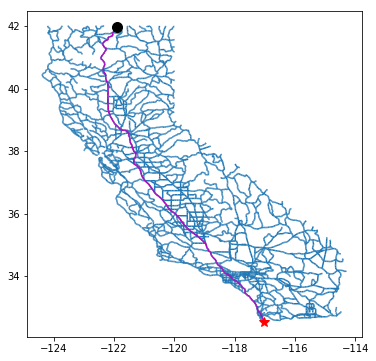

In [4]:
from problem_utils import get_path, display_image, assert_tibbles_are_equivalent, pandas_df_to_markdown_table
print("Example of what you will produce in this problem (shortest paths on the California road network):")
display_image(get_path('ca-roads-path-demo.png'))

In [39]:
def get_edgelist(df):
    ### BEGIN SOLUTION
    return [(a, b, {'w': w}) for a, b, w in zip(df["Start_Node_ID"], df["End_Node_ID"], df["L2_distance"])]
    ### END SOLUTION
    
# Demo
edgelist = get_edgelist(edges)
edgelist[:]

[(2471, 2479, {'w': 29.718756}),
 (2463, 2471, {'w': 61.706902}),
 (2443, 2448, {'w': 19.080025}),
 (1417, 1491, {'w': 28.248583}),
 (4961, 4962, {'w': 15.014111999999999}),
 (3150, 3156, {'w': 78.55722}),
 (1629, 1633, {'w': 10.386786}),
 (2234, 2249, {'w': 55.720881999999996}),
 (2159, 2162, {'w': 37.383289000000005}),
 (2154, 2159, {'w': 160.897079}),
 (2148, 2150, {'w': 15.142239000000002}),
 (1312, 1317, {'w': 55.35796}),
 (1692, 1700, {'w': 75.79039}),
 (293, 299, {'w': 19.293741}),
 (3806, 3807, {'w': 19.894999}),
 (3521, 3528, {'w': 85.082039}),
 (3515, 3521, {'w': 104.642044}),
 (3833, 3845, {'w': 75.549019}),
 (3857, 3874, {'w': 81.339333}),
 (3848, 3851, {'w': 10.663867999999999}),
 (3833, 3848, {'w': 82.003647}),
 (472, 475, {'w': 562.864563}),
 (3202, 3203, {'w': 5.514648}),
 (0, 2, {'w': 359.674072}),
 (2, 5, {'w': 137.580414}),
 (5, 7, {'w': 314.74127200000004}),
 (7, 11, {'w': 487.54174800000004}),
 (11, 37, {'w': 227.21356200000002}),
 (0, 1, {'w': 95.952362}),
 (1, 3,

In [41]:
%time
from networkx import Graph
G = Graph()
G.add_nodes_from(nodes["Node_ID"])
G.add_edges_from(edgelist)

print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
The graph has 3278 nodes and 1999 edges.


In [43]:
def get_shortest_path(G):
    from networkx import all_pairs_dijkstra_path
    return dict(all_pairs_dijkstra_path(G, weight='w'))

start = nodes["Node_ID"].iloc[1]
finish = nodes["Node_ID"].iloc[3]
print(f"Calculating a shortest path between all pairs of nodes")
%timeit
path = get_shortest_path(G)
print(f"\n==> This cell made a dictionary of shortest paths using networkX `{type(path)}`:")
print("To use, enter two nodeID's and this will return the shortest path.")
print("If there is no path,it will throw a key error as the pairs that cannot be reached are not stored.")

print(path[start][finish])

Calculating a shortest path between all pairs of nodes

==> This cell made a dictionary of shortest paths using networkX `<class 'dict'>`:
To use, enter two nodeID's and this will return the shortest path.
If there is no path,it will throw a key error as the pairs that cannot be reached are not stored.
[2, 0, 1, 3, 4]


In [26]:
print(path)

{1: {1: [1], 0: [1, 0], 3: [1, 3], 2: [1, 0, 2], 4: [1, 3, 4], 6: [1, 3, 4, 6], 8: [1, 3, 4, 6, 8], 9: [1, 3, 4, 6, 9], 5: [1, 0, 2, 5], 7: [1, 0, 2, 5, 7], 10: [1, 3, 4, 6, 8, 10], 11: [1, 0, 2, 5, 7, 11], 12: [1, 3, 4, 6, 8, 10, 12], 14: [1, 3, 4, 6, 8, 10, 12, 14], 16: [1, 3, 4, 6, 8, 10, 12, 16], 18: [1, 3, 4, 6, 8, 10, 12, 16, 18], 15: [1, 3, 4, 6, 8, 10, 12, 14, 15], 23: [1, 3, 4, 6, 8, 10, 12, 14, 15, 23], 19: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19], 20: [1, 3, 4, 6, 8, 10, 12, 16, 20], 22: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 22], 30: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 30], 25: [1, 3, 4, 6, 8, 10, 12, 16, 20, 25], 31: [1, 3, 4, 6, 8, 10, 12, 16, 20, 31], 29: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 22, 29], 36: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 22, 36], 32: [1, 3, 4, 6, 8, 10, 12, 16, 20, 25, 32], 41: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 22, 29, 41], 34: [1, 3, 4, 6, 8, 10, 12, 14, 15, 19, 22, 29, 34], 37: [1, 0, 2, 5, 7, 11, 37], 44: [1, 3, 4, 6, 8, 10, 12, 16, 20, 31, 38, 44], 38: [1

In [28]:
print(path[2471][2479])

[2471, 2479]
